
Total Number of Brain Samples:
 +----------------------------+---------+
| Category                   |   Count |
+============================+=========+
| Total Tumor Samples        |     169 |
+----------------------------+---------+
| Total Normal Brain Samples |     190 |
+----------------------------+---------+


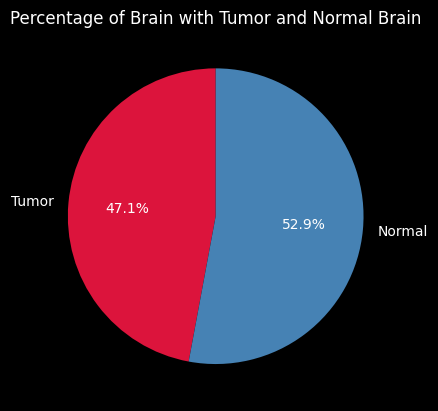

Epoch 1/15
8/8 [==============================] - 14s 2s/step - loss: 31.7140 - accuracy: 0.5784 - val_loss: 7.9234 - val_accuracy: 0.5417
Epoch 2/15
8/8 [==============================] - 13s 2s/step - loss: 10.1757 - accuracy: 0.6446 - val_loss: 8.8622 - val_accuracy: 0.6111
Epoch 3/15
8/8 [==============================] - 13s 2s/step - loss: 4.8367 - accuracy: 0.7387 - val_loss: 6.0948 - val_accuracy: 0.5139
Epoch 4/15
8/8 [==============================] - 13s 2s/step - loss: 2.9940 - accuracy: 0.7561 - val_loss: 4.3714 - val_accuracy: 0.6528
Epoch 5/15
8/8 [==============================] - 13s 2s/step - loss: 1.6314 - accuracy: 0.8258 - val_loss: 4.4650 - val_accuracy: 0.6667
Epoch 6/15
8/8 [==============================] - 13s 2s/step - loss: 2.0154 - accuracy: 0.8223 - val_loss: 3.5947 - val_accuracy: 0.6528
Epoch 7/15
8/8 [==============================] - 14s 2s/step - loss: 1.0148 - accuracy: 0.8885 - val_loss: 2.0995 - val_accuracy: 0.6806
Epoch 8/15
8/8 [================

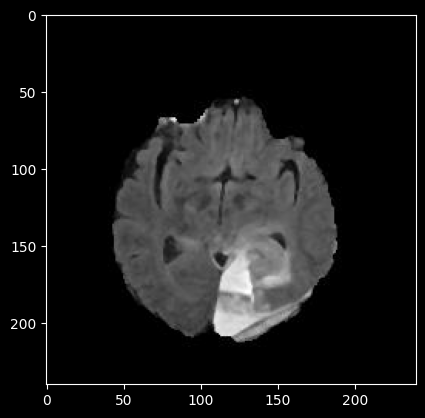

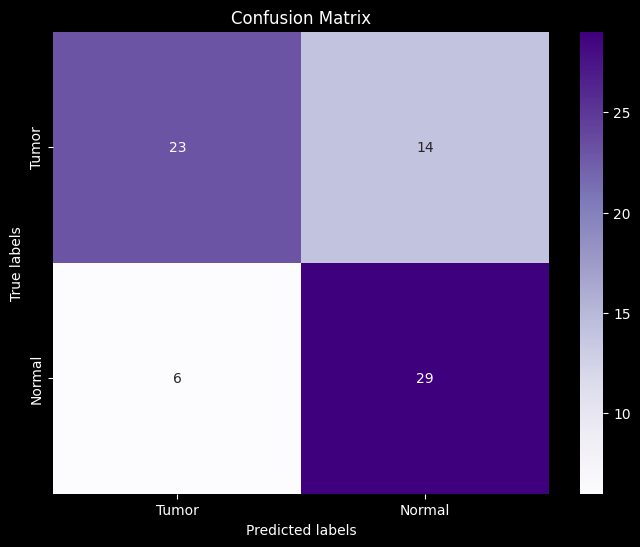

In [3]:
#imports the required libraries, including Keras for building the neural network, and other libraries for image processing, data manipulation, and visualization
import os #to access image file paths and navigate the file system.
import keras #arrange the layers in a linear stack.
from keras.models import Sequential #sequential layers can be created and configured layer by layer in a linear stack.
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization #for CNN
from PIL import Image #to read image files and resize them as well.
import numpy as np #use for manipulating and operating arrays.
import pandas as pd #a data manipulation and analysis library
import matplotlib.pyplot as plt #interface for making charts and plots.
plt.style.use('dark_background') #fro dark background. 
from sklearn.model_selection import train_test_split #splitting datasets into training and testing sets.
from sklearn.preprocessing import OneHotEncoder #convert categorical data into a binary matrix (0 Tumor and 1 Normal)
from tabulate import tabulate #creating formatted tables from data.

#One-hot encode the classes (0 - Tumor, 1 - Normal)
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

#creating 3 important lists for storing data which are data, paths, results
data = []
paths = []
result = []

#loop through the paths of images with tumors
for r, d, f in os.walk(r'/kaggle/input/brain-mri-images-for-brain-tumor-detections/yes'): #for brain images with tumor
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray()[0])
        
#loop through the paths of images without tumors
paths = []
for r, d, f in os.walk(r"/kaggle/input/brain-mri-images-for-brain-tumor-detections/no"): #for brain images without tumor
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray()[0]) 
        
#convert lists to NumPy arrays        
data = np.array(data)
result = np.array(result)
result = result.reshape(len(result), 2)

#creating pie chart to visualize the distribution of tumor and normal samples
tumor_count = np.sum(result[:, 0] == 1)
normal_count = np.sum(result[:, 1] == 1)

#calculate percentages for brain with tumor and without tumor
total_samples = len(result)
tumor_percentage = (tumor_count / total_samples) * 100
normal_percentage = (normal_count / total_samples) * 100

# Create labels and counts for the pie chart
labels = ['Tumor', 'Normal']
counts = [tumor_percentage, normal_percentage]
colors = ['crimson', 'steelblue']

# Print the total number of tumor and normal brain samples in a table
table_data = [["Total Tumor Samples", tumor_count], ["Total Normal Brain Samples", normal_count]]
table_headers = ["Category", "Count"]
table = tabulate(table_data, headers=table_headers, tablefmt="grid")
print("\nTotal Number of Brain Samples:\n", table)

# Create a pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Brain with Tumor and Normal Brain')
plt.show()

#split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

#build the model
#the architecture of a convolutional neural network (CNN) using the Keras library
model = Sequential()

#Conv2D layers perform convolutions on the input data
model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))

#to stabilize and accelerate the training process
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

#converts the multi-dimensional output of the previous layer into a one-dimensional array
model.add(Flatten())

#first dense layer has 512 neurons and uses the ReLU activation function
#second dense layer has 2 neurons (two classes: tumor or normal) and uses the softmax activation function
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(2, activation='softmax')) 

# model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
model.compile(loss="categorical_crossentropy", optimizer="Adamax", metrics=["accuracy"])

y_train.shape
history = model.fit(x_train, y_train, epochs = 15, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

#accuracy of the model
#trained model, 'x_test', 'y_test' are test data
evaluation_results = model.evaluate(x_test, y_test)

# 'evaluate' method returns a list of metrics, including accuracy
accuracy = evaluation_results[1]

print("\nModel Accuracy on Test Set: {:.2f}%".format(accuracy * 100))

#for checking the model
def names(number):
    if number==0:
        return 'Tumor'
    else:
        return 'not a Tumor'

#checking the model's prediction on a sample image
from matplotlib.pyplot import imshow
img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detections/yes/Y (153).jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print("{:.2f}% Confidence this is a {}".format(res[0][classification]*100, names(classification)))

#checking the Accuracy, Precision, Recall adn F1-Score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# 'x_test', 'y_test' are test data
y_pred = model.predict(x_test)

# Convert probabilities to class labels 
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1 score
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes)
recall = recall_score(y_true_classes, y_pred_classes)
f1 = f1_score(y_true_classes, y_pred_classes)

print("\nAccuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

#for confusuion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

#generate and plot the confusion matrix
#'x_test', 'y_test' are test data
y_pred = model.predict(x_test)

# Convert probabilities to class labels 
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Purples', xticklabels=['Tumor', 'Normal'], yticklabels=['Tumor', 'Normal'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
